# The Battle of the Neighborhoods: Is Copenhagen like Paris?

**Author: Paw Hermansen**  
**Date: November 13, 2018**

This notebook contains the very short version of my Capstone Project for the Coursera/IBM course series *IBM Data Science Professional Certificate Specialization*.

The full version with all the details can be found in [https://github.com/pawhermansen/Coursera_Capstone/blob/master/IsCopenhagenLikeParis.ipynb](https://github.com/pawhermansen/Coursera_Capstone/blob/master/IsCopenhagenLikeParis.ipynb).

# The Problem

Travel guide publisher *Lonely Planet* recently put the danish capital Copenhagen on top of their list of the best cities to visit in 2019. Copenhagen has a lot to offer, says *Lonely Planet* and mentions the cyclists, the many green spaces, the old and new architecture, the great museums, Tivoli garden, the galleries, the restaurants, including fancy New Nordic restaurants and even marvelous street food markets and indie bars.

That made some Copenhageners claim in the local newspapers that Copenhagen is like Paris in the summer. If this is true it will be interesting not only for tourists trying to find new and exciting destinations but also for the Copenhagen tourist association, visitcopenhagen.dk, that could direct its marketing to compete directly against other cities like Paris.

It is not stated clearly in exactly what way the likeness between Copenhagen and Paris is thought to be. It is clearly not in the weather because the Copenhageners compare Copenhagen in the summer to Paris and they do not mention the winter. Also it is clearly not in the languages - even though that both Copenhagen and Paris are very alike in that they speak languages that are totally un-understandable to anyone else. In Copenhhagen, however, nearly everyone also speaks fluent English which is certainly not the case in Paris.

The likeness between Copenhagen and Paris is probably more a feeling that when you walk around in Copenhagen and Paris you will see the same kind and distribution of restaurants, bars, sights, bakeries and all other kinds of venues and this is this definition of likeness that I choose to investigate.

This notebook uses tools from Data Science and Machine Learning to investigate if Copenhagen is like Paris in the above mentioned sense.

# Machine Learning Approach

My approach will be to part each of the two cities into neighborhoods that I will consider as homogeneous with respect to their venue types.

Then to see how alike the Copenhagen and the Paris neighborhoods are I will make a cluster analysis of all the neighborhoods together based on their frequency of their venue types. Clustering is a method of so-called unsupervised learning where the algorithm takes data-points that are not catagorized or grouped beforehand and groups them into a given number of clusters or groups based on their likeness. Here the list of venue type frequencies of each neighborhood is a data-point.

When I do this I actually cheat the cluster algorithm a little bit because the data-points **are** categorized beforehand with their city. I do not, however, reveal this to the cluster algorithm that will group the neighborhoods exclusively based on the venue type frequencies. My conclusion will be based on the result of the clustering algorithm compared to which city each neighborhood in each cluster is part of.

For example if I cluster all the neighborhoods into two or more clusters and all the Copenhagen neighborhoods end up in their own clusters and all the Paris neighborhoods end up in other clusters then Copenhagen and Paris are more alike to themself than to each other. But if the neighborhoods ends up being mixed in clusters across the two cities then you are very right in claiming that Copenhagen, or at least some neighborhoods of Copenhagen, are like Paris.

If the two cities in fact have neighborhoods that are alike then the groups will show which neighborhoods from the two cities are most like each other.

# The Paris Neighborhoods

For the Paris neighborhoods I use the 20 so-called arrondissements of Paris that are administrative zones of Paris. The name and the geographical coordinates of the location of each arrondissement can be downloaded in different formats from the [Paris Data](https://opendata.paris.fr) website - the data is covered by the [Open Database License (ODbL)](https://opendatacommons.org/licenses/odbl/).

Later I will use Foursquare to find venues in each neighborhood. To get the venues Foursquare requires the geographical latitude and longitude for each neighborhood center and a maximal distance away from each center to search. I select a reasonable distance for each neighborhood center and end up with the search-areas show in the following map of Paris. 

In [1]:
import folium
def createTownMap(df, zoom = 12):
    # Create map centered around the mean latitude and longitude values
    latitue = df['Latitude'].mean()
    longitude = df['Longitude'].mean()

    townmap = folium.Map(location=[latitue, longitude], zoom_start=zoom)

    # Add the search-areas to map.
    for lat, lng, neighborhood, radius in zip(df['Latitude'],
                                              df['Longitude'],
                                              df['Neighborhood'],
                                              df['Distance to Nearest'] / 2):
        label = folium.Popup(neighborhood, parse_html=True)

        folium.Marker(
            [lat, lng],
            popup = neighborhood).add_to(townmap) 
        
        folium.Circle(
            radius=radius,
            location=[lat, lng],
            popup=label,
            color='blue',
            stroke= False,
            fill=True,
            fill_opacity=0.2).add_to(townmap)
    return townmap

In [2]:
import pandas as pd

df_parisNeighborhoods = pd.read_csv('data/paris_neighborhoods.csv')
createTownMap(df_parisNeighborhoods)

# The Copenhagen Neighborhoods

The Copenhagen neighborhoods are a little more difficult to get. From WikiPedia [Bydele i Københavns kommune](https://da.wikipedia.org/wiki/Bydele_i_K%C3%B8benhavns_Kommune) ("neighbohoods in Copenhagen Commune") I collect the ten administrative areas of Copenhagen.

The neighborhood *Indre by* ("Inner City") can be subdivided into smaller functionel neigborhoods but it turns out that FourSquare, that I will use later, has too few venues registered for some of the smaller neighborhoods and so I stay with *Indre by* as one neighborhood.

Also I include *Frederiksberg* that is not administratively a part of the Copenhagen Commune but geographically lies inside the borders of Copenhagen (see [https://www.quora.com/Why-is-Frederiksberg-not-a-part-of-Copenhagen](https://www.quora.com/Why-is-Frederiksberg-not-a-part-of-Copenhagen) for more information about this curiosity).

As for the Paris neighborhoods I select a reasonable distance for each neighborhood center and end up with the search-areas show in the following map of Copenhagen.

In [3]:
import pandas as pd

df_cphNeighborhoods = pd.read_csv('data/cph_neighborhoods.csv')
createTownMap(df_cphNeighborhoods)

# The Venue categories within each neighborhood

Foursquare is a service that you can use to find the best places to eat, drink, shop, or visit in any city in the world. They also offer access through an open API with some limitations, registering necessary.

We can call the Foursquare API a list of venues and their types within a certain distance from any location within Copenhagen and Paris. This means that for our purpose the neighborhoods will be defined as a center location and a radius around this center.

I get the venues for all the Copenhagen and Paris neighborhhods from Foursquare  and get a large table with 2775 venues all in all. The first ten rows is seen below.

In [4]:
df_venues = pd.read_csv('data/venues.csv')
df_venues.head(10)

,Neighborhood,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amager Vest,Copenhagen,55.619371,12.575584,Naturcenter Amager,55.614620,12.574853,Park
1,Amager Vest,Copenhagen,55.619371,12.575584,8tallet,55.618353,12.571841,Building
2,Amager Vest,Copenhagen,55.619371,12.575584,Royal Arena,55.625469,12.573884,Event Space
3,Amager Vest,Copenhagen,55.619371,12.575584,Royal Bar,55.625246,12.573738,Bar
4,Amager Vest,Copenhagen,55.619371,12.575584,Crowne Plaza Copenhagen Towers,55.626940,12.577740,Hotel
5,Amager Vest,Copenhagen,55.619371,12.575584,Nordisk Film Biografer - Field's,55.629421,12.579235,Multiplex
6,Amager Vest,Copenhagen,55.619371,12.575584,Irma,55.631840,12.574655,Supermarket
7,Amager Vest,Copenhagen,55.619371,12.575584,Byparken,55.633980,12.577286,Park
8,Amager Vest,Copenhagen,55.619371,12.575584,Københavns Flugtskytte Klub,55.629684,12.557442,Sports Club
9,Amager Vest,Copenhagen,55.619371,12.575584,Fitness dk,55.630144,12.578373,Gym / Fitness Center


In [5]:
df_categories = pd.DataFrame(df_venues['Venue Category'].unique(), columns = ['Venue Category'])
print('There are {} unique categories.'.format(len(df_categories)))

There are 291 unique categories.


That is quite a lot of different venue categories and there will certainly be no problems in expressing the differencies in the neighborhoods.

On the other hand, the venue categories might be too detailed, for example with restaurants that are categorized by their kitchens originating country. After seeing the first results of the clustering it might become relevant to consider if, for example, a Scandinavian Restaurant in Copenhagen should or should not be counted as being different from a French Restaurant in Paris.

In [6]:
df_restaurantCategories = df_categories[df_categories['Venue Category'].str.contains("Restaurant")]
print('Number of different Restaurant categories in the venues data is', len(df_restaurantCategories))
df_restaurantCategories.head(10)

Number of different Restaurant categories in the venues data is 65


,Venue Category
9,Scandinavian Restaurant
11,Tapas Restaurant
20,Fast Food Restaurant
24,Indian Restaurant
25,Restaurant
45,Sushi Restaurant
55,Italian Restaurant
59,Thai Restaurant
62,Chinese Restaurant
66,American Restaurant


The table below shows that Foursquare returned three times as many venues per square kilometer for Paris when compared to Copenhagen.

This could indicate that Paris have more venues that are interesting enough to make it into Foursquare but I think it is much more likely that the Foursquare app is more popular in France than in Denmark and I consider this fact as having no influence on the results in this notebook.

In [7]:
import numpy as np

df_parisSearchAreas = np.square(df_parisNeighborhoods['Distance to Nearest'] / 2) * 3.1416
df_cphSearchAreas = np.square(df_cphNeighborhoods['Distance to Nearest'] / 2) * 3.1416

df_venuesByCity = df_venues.groupby('City').size().reset_index(name='Venue count')
df_venuesByCity['Search Area in m2'] = [df_cphSearchAreas.sum(), df_parisSearchAreas.sum()]
df_venuesByCity['Venues per km2'] = 1e6 * df_venuesByCity['Venue count'] / df_venuesByCity['Search Area in m2']
df_venuesByCity['Venues per km2'] = df_venuesByCity['Venues per km2'].map('{:,.2f}'.format)

df_venuesByCity

,City,Venue count,Search Area in m2,Venues per km2
0,Copenhagen,811,6.359111e+07,12.75
1,Paris,1964,5.360275e+07,36.64


# Arrange Venue Category Data

To be used with the clustering algorithm I need a table of the frequencies of occurence of each venue category for each neighborhood. After a lot of hard work I end up with a table that has the first ten rows as shown below. Most of the numbers are 0 but the sum of all numbers in each neighborhood, i.e. each row, is 1.

Actually I also make another table that I call *simplified* because it only contains one Restaurant category instead of a category for each nationality of restaurants. Both tables will be used for clustering in a moment.

In [8]:
df_freq = pd.read_csv('data/frequencies.csv')
df_freq.head(10)

,Neighborhood,City,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Vineyard,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amager Vest,Copenhagen,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.00000,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0
1,Amager Øst,Copenhagen,0.0,0.0,0.0,0.00,0.010309,0.010309,0.0,0.00,...,0.00,0.0,0.00000,0.00,0.0,0.00,0.000000,0.00,0.010309,0.0
2,Batignolles-Monceau,Paris,0.0,0.0,0.0,0.00,0.010000,0.000000,0.0,0.00,...,0.00,0.0,0.01000,0.00,0.0,0.01,0.000000,0.00,0.010000,0.0
3,Bispebjerg,Copenhagen,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.00000,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0
4,Bourse,Paris,0.0,0.0,0.0,0.00,0.000000,0.010000,0.0,0.00,...,0.00,0.0,0.00000,0.00,0.0,0.04,0.010000,0.01,0.000000,0.0
5,Brønshøj-Husum,Copenhagen,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.00000,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0
6,Buttes-Chaumont,Paris,0.0,0.0,0.0,0.00,0.011905,0.000000,0.0,0.00,...,0.00,0.0,0.02381,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0
7,Buttes-Montmartre,Paris,0.0,0.0,0.0,0.01,0.000000,0.000000,0.0,0.01,...,0.02,0.0,0.02000,0.01,0.0,0.02,0.000000,0.00,0.000000,0.0
8,Entrepôt,Paris,0.0,0.0,0.0,0.02,0.000000,0.000000,0.0,0.00,...,0.01,0.0,0.00000,0.00,0.0,0.01,0.030000,0.00,0.000000,0.0
9,Frederiksberg,Copenhagen,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,...,0.00,0.0,0.00000,0.00,0.0,0.00,0.010989,0.00,0.000000,0.0


# Human Readable Table of Top Ten Venue Categories

To be able to compare the neighborhoods myself after clustering them, I create a table of the top ten venue categories for each neighborhood for both the full and the simplified categories. The full table is shown below.

In [9]:
df_topTenVenues = pd.read_csv('data/topTenVenues.csv')
df_topTenVenues

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amager Vest,Copenhagen,Hotel,Park,Supermarket,Pizza Place,Restaurant,Golf Course,Café,Gym / Fitness Center,Grocery Store,Indian Restaurant
1,Amager Øst,Copenhagen,Beach,Bakery,Coffee Shop,Café,Pizza Place,Gym / Fitness Center,Burger Joint,Sushi Restaurant,Grocery Store,Chinese Restaurant
2,Batignolles-Monceau,Paris,French Restaurant,Hotel,Italian Restaurant,Bakery,Restaurant,Bistro,Plaza,Pastry Shop,Japanese Restaurant,Bar
3,Bispebjerg,Copenhagen,Pizza Place,Grocery Store,Café,Convenience Store,Supermarket,Sushi Restaurant,Thai Restaurant,Gym / Fitness Center,Dance Studio,Plaza
4,Bourse,Paris,French Restaurant,Bistro,Wine Bar,Japanese Restaurant,Salad Place,Plaza,Cocktail Bar,Italian Restaurant,Bar,Hotel
5,Brønshøj-Husum,Copenhagen,Bakery,Park,Supermarket,Plaza,Grocery Store,Martial Arts Dojo,Café,Theater,Scandinavian Restaurant,Bus Stop
6,Buttes-Chaumont,Paris,French Restaurant,Bar,Pizza Place,Café,Multiplex,Beer Bar,Bed & Breakfast,Brasserie,Japanese Restaurant,Scenic Lookout
7,Buttes-Montmartre,Paris,French Restaurant,Bar,Bistro,Pizza Place,Italian Restaurant,Restaurant,Plaza,Café,Bookstore,Vegetarian / Vegan Restaurant
8,Entrepôt,Paris,Coffee Shop,French Restaurant,Bistro,Pizza Place,Cocktail Bar,Indian Restaurant,Italian Restaurant,Asian Restaurant,Restaurant,Seafood Restaurant
9,Frederiksberg,Copenhagen,Café,Scandinavian Restaurant,Park,Bakery,French Restaurant,Italian Restaurant,Bar,Sushi Restaurant,Theater,Coffee Shop


For the fun of it the categories for separated Copenhagen and Paris can be shown as the following word clouds.

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordCloud(city):
    df = df_topTenVenues[df_topTenVenues['City'] == city].iloc[:,1:]
    df = df.replace(r' ','\u00a0', regex=True)

    words = ''
    for i in range(10):
        words = words + ' ' + ' '.join(df.iloc[:,i])

    wordcloud = WordCloud(width = 2400, height=1200, background_color='white').generate(words)

    plt.imshow(wordcloud)
    plt.axis('off')
    return plt


### Copenhagen Venue Categories

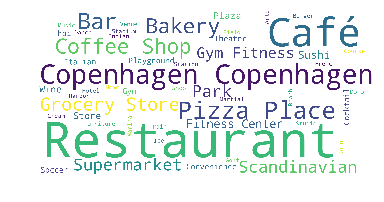

In [11]:
plt = wordCloud('Copenhagen')
plt.show()

### Paris Venue Categories

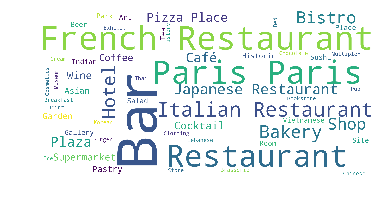

In [12]:
plt = wordCloud('Paris')
plt.show()

# The clustering

I make four different clusterings.

* Cluster neighborhoods into two clusters for full category set
* Cluster neighborhoods into six clusters for full category set
* Cluster neighborhoods into two clusters for simplified category set
* Cluster neighborhoods into six clusters for simplified category set

I will just show one example in detail.

### Cluster neighborhoods into six clusters for full category set

In [13]:
from sklearn.cluster import KMeans

kclusters = 6
df_freqClustering = df_freq.copy().drop(['Neighborhood', 'City'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_freqClustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 4, 2, 4, 2, 0, 0, 5, 2, 3, 4, 5, 5, 5, 0, 2, 4, 4, 4, 4, 4,
       0, 4, 5, 2, 2, 4, 2, 4, 1], dtype=int32)

### Result and Discussion

To visualize the result I create a table for each clustered group that shows the neighborhoods of the group and the neighborhoods top 10 venue types.

It turns out that most of the groups have no mixing between the two cities at all and only one group that has minimal mixing with *Indre By* (*Inner City*) of Copenhagen. It seems like the coffee shops plays a role in the clustering but also cafés, bars, wine bars and plaza might play a role.

This result is perhaps not a very strong proof of likeness between Copenhagen and Paris but at least it suggests that *Inner City* of Copenhagen is somewhat like the Paris neighborhoods *Entrepôt*, *Louvre*, *Luxembourg*, and *Temple*.

In [14]:
from IPython.display import Markdown, display

def printClusters(df, labels):
    df.insert(2, 'Cluster', labels)
    for cluster in range(kclusters):
        countCopenhagen = df[(df['Cluster'] == cluster) & (df['City'] == 'Copenhagen')].shape[0]
        countParis = df[(df['Cluster'] == cluster) & (df['City'] == 'Paris')].shape[0]
        print()
        display(Markdown('**Group {} with {} Copenhagen and {} Paris neighborhoods:**'.format(cluster, countCopenhagen, countParis)))
        display(df[df['Cluster'] == cluster])

printClusters(df_topTenVenues.copy(), kmeans.labels_)

**Group 0 with 0 Copenhagen and 4 Paris neighborhoods:**

,Neighborhood,City,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Buttes-Chaumont,Paris,0,French Restaurant,Bar,Pizza Place,Café,Multiplex,Beer Bar,Bed & Breakfast,Brasserie,Japanese Restaurant,Scenic Lookout
7,Buttes-Montmartre,Paris,0,French Restaurant,Bar,Bistro,Pizza Place,Italian Restaurant,Restaurant,Plaza,Café,Bookstore,Vegetarian / Vegan Restaurant
15,Ménilmontant,Paris,0,French Restaurant,Bar,Plaza,Bakery,Supermarket,Bistro,Japanese Restaurant,Italian Restaurant,Café,Hotel
22,Popincourt,Paris,0,Bar,French Restaurant,Cocktail Bar,Bistro,Italian Restaurant,Restaurant,Vietnamese Restaurant,Beer Bar,Pizza Place,Wine Bar


**Group 1 with 1 Copenhagen and 0 Paris neighborhoods:**

,Neighborhood,City,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Østerbro,Copenhagen,1,Harbor / Marina,Coffee Shop,Bakery,Playground,Pizza Place,Soccer Stadium,Gym,Ice Cream Shop,Plaza,Platform


**Group 2 with 9 Copenhagen and 0 Paris neighborhoods:**

,Neighborhood,City,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amager Vest,Copenhagen,2,Hotel,Park,Supermarket,Pizza Place,Restaurant,Golf Course,Café,Gym / Fitness Center,Grocery Store,Indian Restaurant
1,Amager Øst,Copenhagen,2,Beach,Bakery,Coffee Shop,Café,Pizza Place,Gym / Fitness Center,Burger Joint,Sushi Restaurant,Grocery Store,Chinese Restaurant
3,Bispebjerg,Copenhagen,2,Pizza Place,Grocery Store,Café,Convenience Store,Supermarket,Sushi Restaurant,Thai Restaurant,Gym / Fitness Center,Dance Studio,Plaza
5,Brønshøj-Husum,Copenhagen,2,Bakery,Park,Supermarket,Plaza,Grocery Store,Martial Arts Dojo,Café,Theater,Scandinavian Restaurant,Bus Stop
9,Frederiksberg,Copenhagen,2,Café,Scandinavian Restaurant,Park,Bakery,French Restaurant,Italian Restaurant,Bar,Sushi Restaurant,Theater,Coffee Shop
16,Nørrebro,Copenhagen,2,Coffee Shop,Pizza Place,Café,Bakery,Thai Restaurant,Gym / Fitness Center,Playground,Wine Bar,Park,Beer Bar
25,Valby,Copenhagen,2,Coffee Shop,Café,Pizza Place,Gym / Fitness Center,Bakery,Grocery Store,Sushi Restaurant,Supermarket,Indian Restaurant,Thai Restaurant
26,Vanløse,Copenhagen,2,Grocery Store,Convenience Store,Pizza Place,Soccer Field,Supermarket,Train Station,Gym,Scandinavian Restaurant,Café,Bakery
28,Vesterbro/Kongens Enghave,Copenhagen,2,Café,Cocktail Bar,Coffee Shop,Pizza Place,Scandinavian Restaurant,Wine Bar,Italian Restaurant,Music Venue,Park,Bakery


**Group 3 with 0 Copenhagen and 1 Paris neighborhoods:**

,Neighborhood,City,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Gobelins,Paris,3,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,French Restaurant,Hotel,Bakery,Supermarket,Sushi Restaurant,Cantonese Restaurant


**Group 4 with 0 Copenhagen and 11 Paris neighborhoods:**

,Neighborhood,City,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Batignolles-Monceau,Paris,4,French Restaurant,Hotel,Italian Restaurant,Bakery,Restaurant,Bistro,Plaza,Pastry Shop,Japanese Restaurant,Bar
4,Bourse,Paris,4,French Restaurant,Bistro,Wine Bar,Japanese Restaurant,Salad Place,Plaza,Cocktail Bar,Italian Restaurant,Bar,Hotel
11,Hôtel-de-Ville,Paris,4,French Restaurant,Hotel,Ice Cream Shop,Plaza,Wine Bar,Pastry Shop,Bakery,Tea Room,Garden,Seafood Restaurant
17,Observatoire,Paris,4,French Restaurant,Hotel,Italian Restaurant,Bar,Japanese Restaurant,Bakery,Sushi Restaurant,Indian Restaurant,Bistro,Pizza Place
18,Opéra,Paris,4,French Restaurant,Hotel,Cocktail Bar,Japanese Restaurant,Bistro,Italian Restaurant,Bar,Wine Bar,Bakery,Vegetarian / Vegan Restaurant
19,Palais-Bourbon,Paris,4,French Restaurant,Hotel,Plaza,Italian Restaurant,Café,History Museum,Historic Site,Garden,Cocktail Bar,Bakery
20,Panthéon,Paris,4,French Restaurant,Bar,Italian Restaurant,Café,Wine Bar,Bakery,Plaza,Pub,Hotel,Greek Restaurant
21,Passy,Paris,4,French Restaurant,Bakery,Italian Restaurant,Café,Supermarket,Garden,Park,Pizza Place,Bistro,Gym / Fitness Center
23,Reuilly,Paris,4,French Restaurant,Japanese Restaurant,Hotel,Italian Restaurant,Plaza,Supermarket,Bakery,Pizza Place,Asian Restaurant,Restaurant
27,Vaugirard,Paris,4,French Restaurant,Hotel,Italian Restaurant,Bakery,Lebanese Restaurant,Coffee Shop,Korean Restaurant,Park,Japanese Restaurant,Indian Restaurant


**Group 5 with 1 Copenhagen and 4 Paris neighborhoods:**

,Neighborhood,City,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Entrepôt,Paris,5,Coffee Shop,French Restaurant,Bistro,Pizza Place,Cocktail Bar,Indian Restaurant,Italian Restaurant,Asian Restaurant,Restaurant,Seafood Restaurant
12,Indre By,Copenhagen,5,Coffee Shop,Restaurant,Scandinavian Restaurant,Cocktail Bar,Café,Wine Bar,Bar,Furniture / Home Store,Plaza,Theater
13,Louvre,Paris,5,French Restaurant,Hotel,Plaza,Café,Exhibit,Coffee Shop,Japanese Restaurant,Historic Site,Bar,Art Museum
14,Luxembourg,Paris,5,French Restaurant,Italian Restaurant,Hotel,Wine Bar,Bistro,Tea Room,Bakery,Pastry Shop,Chocolate Shop,Plaza
24,Temple,Paris,5,French Restaurant,Bistro,Hotel,Café,Art Gallery,Italian Restaurant,Coffee Shop,Burger Joint,Pizza Place,Boutique


# Conclusion

The claim that Copenhagen is like Paris is somewhat supported by this investigation using tools from Data Science and Machine Learning and using Foursquare venue type data to define likeness. The evidence is not overwhelming in that some of the experiments only showed minimal mixing between the neighborhoods of Copenhagen and Paris.

The mixing that does occur, however, seems to be consistent between the experiments and they show that several Copenhagen neighborhoods, and especially *Indre By* (*Inner City*), have many likenesses with the Paris neighborhoods *Entrepôt*, *Louvre*, *Luxembourg*, *Temple*, and *Buttes-Chaumont*.